In [1]:
import os
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import requests
from plotly import __version__
from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

print(__version__)  # need 1.9.0 or greater
init_notebook_mode(connected=True)

5.6.0


In [2]:
def plotly_df(df, title=""):
    data = []

    for column in df.columns:
        trace = go.Scatter(x=df.index, y=df[column], mode="lines", name=column)
        data.append(trace)

    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)

In [3]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [4]:
df = pd.read_csv(DATA_PATH + "wiki_machine_learning.csv", sep=" ")
df = df[df["count"] != 0]
df.head()

date  count lang              page  rank   month             title
81  2015-01-01   1414   en  Machine_learning  8708  201501  Machine_learning
80  2015-01-02   1920   en  Machine_learning  8708  201501  Machine_learning
79  2015-01-03   1338   en  Machine_learning  8708  201501  Machine_learning
78  2015-01-04   1404   en  Machine_learning  8708  201501  Machine_learning
77  2015-01-05   2264   en  Machine_learning  8708  201501  Machine_learning

In [5]:
df.shape

(383, 7)

In [6]:
df.date = pd.to_datetime(df.date)

In [7]:
df.set_index("date")[["count"]]

count
date             
2015-01-01   1414
2015-01-02   1920
2015-01-03   1338
2015-01-04   1404
2015-01-05   2264
...           ...
2016-01-16   1644
2016-01-17   1836
2016-01-18   2983
2016-01-19   3389
2016-01-20   3559

[383 rows x 1 columns]

In [8]:
plotly_df(df.set_index("date")[["count"]])

In [9]:
from prophet import Prophet

In [10]:
predictions = 30

df = df[["date", "count"]]
df.columns = ["ds", "y"]
df.tail()

ds     y
382 2016-01-16  1644
381 2016-01-17  1836
376 2016-01-18  2983
375 2016-01-19  3389
372 2016-01-20  3559

In [11]:
df.shape

(383, 2)

## Task 1

In [12]:
df_train = df[:-predictions]
df_train.tail(n=7)

ds     y
356 2015-12-15  3229
357 2015-12-16  3967
358 2015-12-17  2870
363 2015-12-18  2475
364 2015-12-19  1659
344 2015-12-20  1534
343 2015-12-21  2425

In [13]:
df_train.shape

(353, 2)

In [14]:
prophet_model = Prophet()

In [15]:
prophet_model.fit(df_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future = prophet_model.make_future_dataframe(periods=predictions)
future.tail()

ds
378 2016-01-16
379 2016-01-17
380 2016-01-18
381 2016-01-19
382 2016-01-20

In [17]:
future.shape

(383, 1)

In [18]:
forecast = prophet_model.predict(future)
forecast.tail(n=7)

ds        trend   yhat_lower   yhat_upper  trend_lower  \
376 2016-01-14  2960.529167  2911.217414  3711.956670  2944.231246   
377 2016-01-15  2965.827304  2575.491850  3394.492690  2948.543674   
378 2016-01-16  2971.125440  1682.705782  2504.330013  2952.594023   
379 2016-01-17  2976.423576  1873.561060  2668.404956  2956.623058   
380 2016-01-18  2981.721713  2876.403905  3717.753063  2960.270519   
381 2016-01-19  2987.019849  3124.193398  3938.399168  2964.130692   
382 2016-01-20  2992.317986  3001.208700  3848.292238  2968.273520   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
376  2978.358829      326.990030            326.990030            326.990030   
377  2985.400383        7.105028              7.105028              7.105028   
378  2992.474203     -861.666255           -861.666255           -861.666255   
379  2999.724010     -720.685978           -720.685978           -720.685978   
380  3006.170100      281.426215            281.426215            281.426215   
381  3012.841910      541.366440            541.366440            541.366440   
382  3019.795470      425.464520            425.464520            425.464520   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
376  326.990030    326.990030    326.990030                   0.0   
377    7.105028      7.105028      7.105028                   0.0   
378 -861.666255   -861.666255   -861.666255                   0.0   
379 -720.685978   -720.685978   -720.685978                   0.0   
380  281.426215    281.426215    281.426215                   0.0   
381  541.366440    541.366440    541.366440                   0.0   
382  425.464520    425.464520    425.464520                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
376                         0.0                         0.0  3287.519197  
377                         0.0                         0.0  2972.932332  
378                         0.0                         0.0  2109.459185  
379                         0.0                         0.0  2255.737598  
380                         0.0                         0.0  3263.147928  
381                         0.0                         0.0  3528.386289  
382                         0.0                         0.0  3417.782506

In [19]:
forecast.shape

(383, 16)

In [20]:
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail()

ds   yhat_lower   yhat_upper         yhat
378 2016-01-16  1682.705782  2504.330013  2109.459185
379 2016-01-17  1873.561060  2668.404956  2255.737598
380 2016-01-18  2876.403905  3717.753063  3263.147928
381 2016-01-19  3124.193398  3938.399168  3528.386289
382 2016-01-20  3001.208700  3848.292238  3417.782506

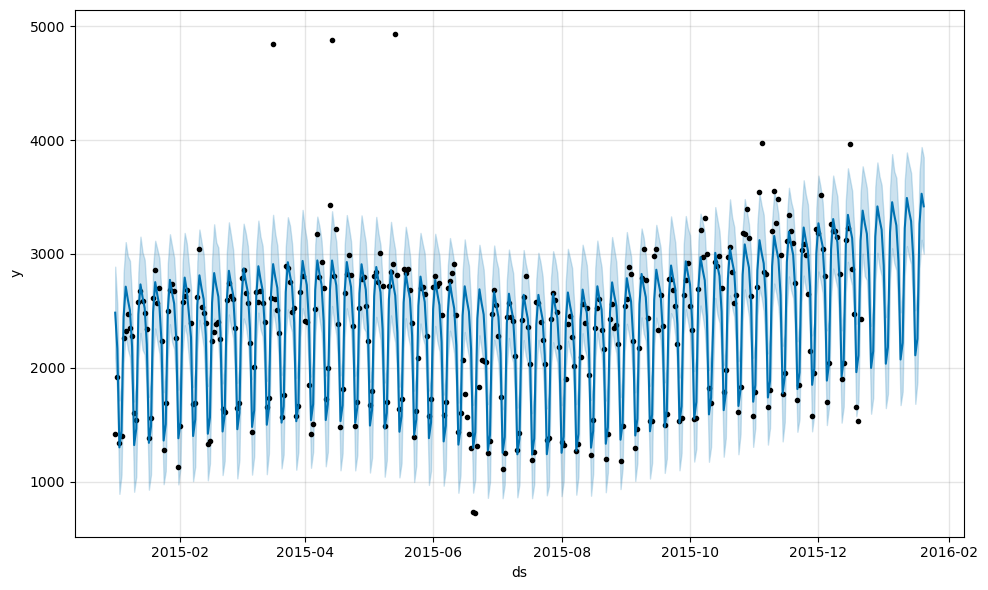

In [21]:
prophet_model.plot(forecast)

In [22]:
forecast[forecast['ds'] == "2016-01-20"]['yhat']

382    3417.782506
Name: yhat, dtype: float64

forecast for the 2016-01-20 is 3417 views ( nearest integer is 3426)

## Task 2

In [23]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [24]:
y_true = df[-predictions:]['y']
y_predicted = forecast[-predictions:]['yhat']

In [25]:
y_true.shape, y_predicted.shape

((30,), (30,))

In [26]:
y_true.tail(n=30)

346    2469
345    2292
348    1671
347    1227
350    1367
349    1373
352    2181
351    2162
353    2107
354    1590
369    1159
370    1704
371    1724
365    3180
366    3180
367    3186
368    3055
373    2874
374    1674
380    1873
379    3083
378    3319
377    3145
384    3164
383    2743
382    1644
381    1836
376    2983
375    3389
372    3559
Name: y, dtype: int64

In [27]:
y_predicted.tail(n=30)

353    3380.038469
354    3269.434686
355    3176.258332
356    2861.671467
357    1998.198320
358    2144.476733
359    3151.887063
360    3417.125424
361    3306.521641
362    3213.345287
363    2898.758422
364    2035.285275
365    2181.563688
366    3188.974018
367    3454.212379
368    3343.608596
369    3250.432242
370    2935.845377
371    2072.372230
372    2218.650643
373    3226.060973
374    3491.299334
375    3380.695551
376    3287.519197
377    2972.932332
378    2109.459185
379    2255.737598
380    3263.147928
381    3528.386289
382    3417.782506
Name: yhat, dtype: float64

In [28]:
df[-predictions:]

ds     y
346 2015-12-22  2469
345 2015-12-23  2292
348 2015-12-24  1671
347 2015-12-25  1227
350 2015-12-26  1367
349 2015-12-27  1373
352 2015-12-28  2181
351 2015-12-29  2162
353 2015-12-30  2107
354 2015-12-31  1590
369 2016-01-01  1159
370 2016-01-02  1704
371 2016-01-03  1724
365 2016-01-04  3180
366 2016-01-05  3180
367 2016-01-06  3186
368 2016-01-07  3055
373 2016-01-08  2874
374 2016-01-09  1674
380 2016-01-10  1873
379 2016-01-11  3083
378 2016-01-12  3319
377 2016-01-13  3145
384 2016-01-14  3164
383 2016-01-15  2743
382 2016-01-16  1644
381 2016-01-17  1836
376 2016-01-18  2983
375 2016-01-19  3389
372 2016-01-20  3559

In [29]:
forecast[-predictions:]

ds        trend   yhat_lower   yhat_upper  trend_lower  \
353 2015-12-22  2838.672029  3001.201757  3769.240438  2838.672029   
354 2015-12-23  2843.970166  2805.348546  3677.215202  2843.970166   
355 2015-12-24  2849.268302  2769.960796  3579.451117  2849.261161   
356 2015-12-25  2854.566438  2427.722040  3271.295031  2854.331520   
357 2015-12-26  2859.864575  1595.919161  2368.588519  2859.261523   
358 2015-12-27  2865.162711  1732.573266  2553.746713  2864.158524   
359 2015-12-28  2870.460848  2755.510838  3590.388585  2868.977115   
360 2015-12-29  2875.758984  3009.798307  3803.321396  2873.898208   
361 2015-12-30  2881.057121  2886.543249  3681.481566  2878.570642   
362 2015-12-31  2886.355257  2808.022031  3604.900055  2883.131680   
363 2016-01-01  2891.653393  2524.705073  3321.467240  2887.738482   
364 2016-01-02  2896.951530  1645.534883  2445.997332  2892.298973   
365 2016-01-03  2902.249666  1769.865129  2600.502684  2896.927319   
366 2016-01-04  2907.547803  2779.919139  3577.147944  2901.609761   
367 2016-01-05  2912.845939  3049.562597  3876.280690  2906.163700   
368 2016-01-06  2918.144076  2919.622865  3724.750090  2910.722871   
369 2016-01-07  2923.442212  2858.103511  3667.821779  2915.019681   
370 2016-01-08  2928.740349  2496.465219  3337.774327  2919.535901   
371 2016-01-09  2934.038485  1671.854106  2487.219009  2923.788399   
372 2016-01-10  2939.336621  1788.952065  2655.947249  2928.097484   
373 2016-01-11  2944.634758  2809.102257  3646.885017  2932.328219   
374 2016-01-12  2949.932894  3067.858949  3891.113746  2936.414488   
375 2016-01-13  2955.231031  2977.866832  3794.452638  2940.589496   
376 2016-01-14  2960.529167  2911.217414  3711.956670  2944.231246   
377 2016-01-15  2965.827304  2575.491850  3394.492690  2948.543674   
378 2016-01-16  2971.125440  1682.705782  2504.330013  2952.594023   
379 2016-01-17  2976.423576  1873.561060  2668.404956  2956.623058   
380 2016-01-18  2981.721713  2876.403905  3717.753063  2960.270519   
381 2016-01-19  2987.019849  3124.193398  3938.399168  2964.130692   
382 2016-01-20  2992.317986  3001.208700  3848.292238  2968.273520   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
353  2838.672029      541.366440            541.366440            541.366440   
354  2843.970166      425.464520            425.464520            425.464520   
355  2849.388357      326.990030            326.990030            326.990030   
356  2855.028301        7.105028              7.105028              7.105028   
357  2860.761422     -861.666255           -861.666255           -861.666255   
358  2866.648134     -720.685978           -720.685978           -720.685978   
359  2872.542230      281.426215            281.426215            281.426215   
360  2878.202669      541.366440            541.366440            541.366440   
361  2884.180513      425.464520            425.464520            425.464520   
362  2889.894894      326.990030            326.990030            326.990030   
363  2895.880150        7.105028              7.105028              7.105028   
364  2902.077077     -861.666255           -861.666255           -861.666255   
365  2908.271915     -720.685978           -720.685978           -720.685978   
366  2914.367355      281.426215            281.426215            281.426215   
367  2920.901125      541.366440            541.366440            541.366440   
368  2927.237720      425.464520            425.464520            425.464520   
369  2933.358989      326.990030            326.990030            326.990030   
370  2939.496351        7.105028              7.105028              7.105028   
371  2945.945225     -861.666255           -861.666255           -861.666255   
372  2952.381133     -720.685978           -720.685978           -720.685978   
373  2958.635194      281.426215            281.426215            281.426215   
374  2965.306624      541.366440            541.366440            541.366440   
3

In [30]:
mape = mean_absolute_percentage_error(y_true, y_predicted)
print("MAPE: {}".format(mape * 100))

MAPE: 34.19380159794991


we get MAPE equal to 34.19 (the nearest value is 34.5 %)

## Task 3

In [31]:
mae = mean_absolute_error(y_true, y_predicted)
print("MAE: {}".format(mae))

MAE: 593.3705390372357


we get MAE equal to 593 (the nearest value is 600)

## Task 4

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

plt.rcParams["figure.figsize"] = (15, 10)

In [33]:
df_arima = pd.read_csv(DATA_PATH + "wiki_machine_learning.csv", sep=" ")
df_arima = df_arima[df_arima["count"] != 0]
df_arima.head()

date  count lang              page  rank   month             title
81  2015-01-01   1414   en  Machine_learning  8708  201501  Machine_learning
80  2015-01-02   1920   en  Machine_learning  8708  201501  Machine_learning
79  2015-01-03   1338   en  Machine_learning  8708  201501  Machine_learning
78  2015-01-04   1404   en  Machine_learning  8708  201501  Machine_learning
77  2015-01-05   2264   en  Machine_learning  8708  201501  Machine_learning

In [34]:
df_arima = df_arima[["date", "count"]]
df_arima.columns = ["ds", "y"]
df_arima.tail()

ds     y
382  2016-01-16  1644
381  2016-01-17  1836
376  2016-01-18  2983
375  2016-01-19  3389
372  2016-01-20  3559

In [35]:
df_arima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 81 to 372
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      383 non-null    object
 1   y       383 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.0+ KB


In [36]:
list_y = df_arima['y'].values
print(list_y)

[1414 1920 1338 1404 2264 2327 2469 2349 2279 1600 1539 2581 2678 2584
 2485 2336 1384 1556 2612 2860 2571 2697 2232 1280 1690 2501 2680 2737
 2671 2261 1125 1486 2580 2630 2685 2395 1679 1691 2617 3047 2530 2485
 2393 1333 1356 2236 2312 2386 2402 2253 1638 1614 2592 2747 2633 2606
 2351 1645 1688 2792 2857 2659 2566 2214 1432 2004 2668 2576 2670 2565
 2399 1651 1732 2612 4848 2608 2505 2302 1565 1760 2895 2877 2757 2492
 2527 1578 1660 2666 2809 2412 2403 1849 1422 1508 2518 3174 2800 2929
 2702 1722 2002 3428 4881 2804 3217 2384 1482 1816 2659 2819 2994 2811
 2370 1487 1696 2526 2782 2799 2543 2236 1670 1794 2802 2840 2757 3005
 2714 1486 1697 2718 2837 2908 4932 2813 1634 1725 2870 2832 2864 2681
 2393 1390 1618 2086 2699 2711 2649 2277 1576 1724 2713 2808 2720 2742
 2467 1582 1697 2703 2765 2833 2911 2464 1435 1599 2069 1769 1569 1418
 1294  729  726 1312 1827 2068 2056 2049 1252 1353 2474 2682 2553 2275
 1744 1113 1247 2450 2566 2442 2413 2106 1274 1423 2416 2618 2802 2357
 2032 

Dickey-Fuller test: p=0.107392


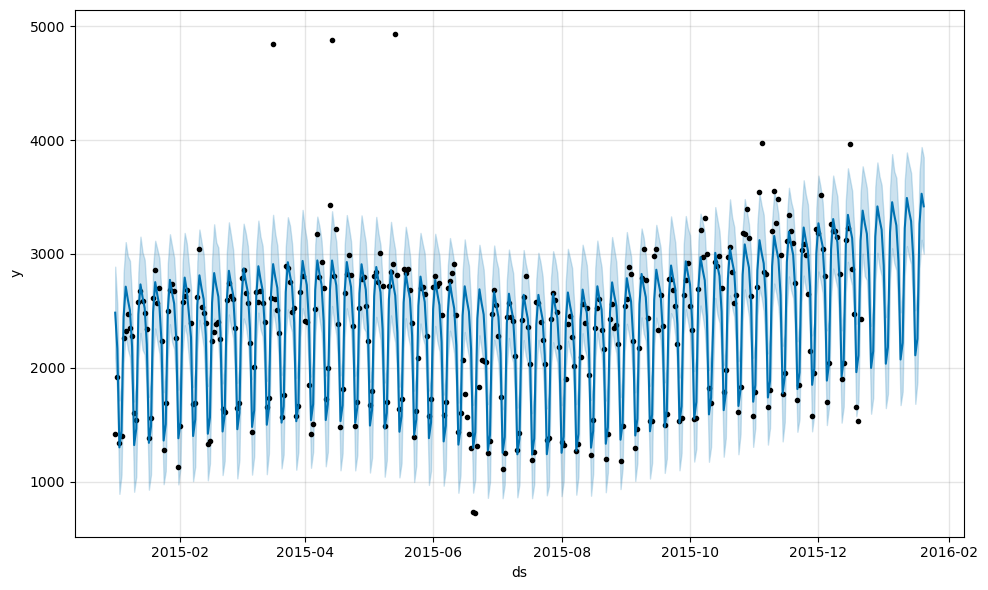

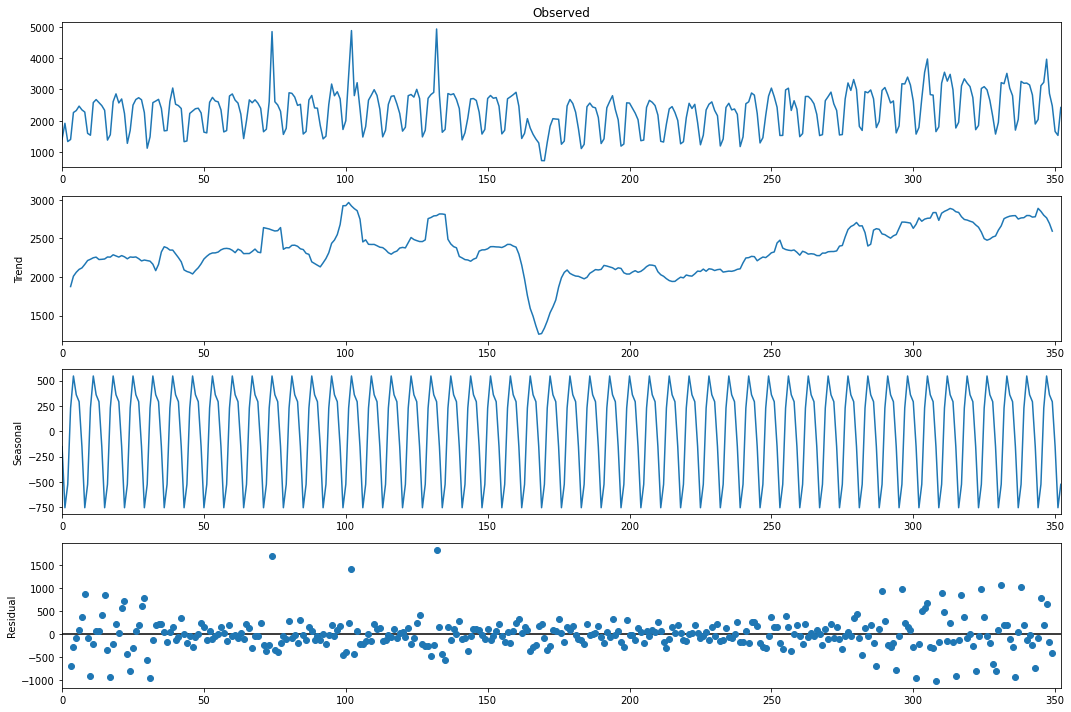

In [37]:
sm.tsa.seasonal_decompose(df_train['y'].values, period=7).plot();
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_train['y'])[1])

In [38]:
dickey_fuller_result = sm.tsa.stattools.adfuller(list_y)[1]
print("Dickey-Fuller test result: {}".format(dickey_fuller_result))

Dickey-Fuller test result: 0.01538366841946938


Dickey-Fuller test: p=0.015384


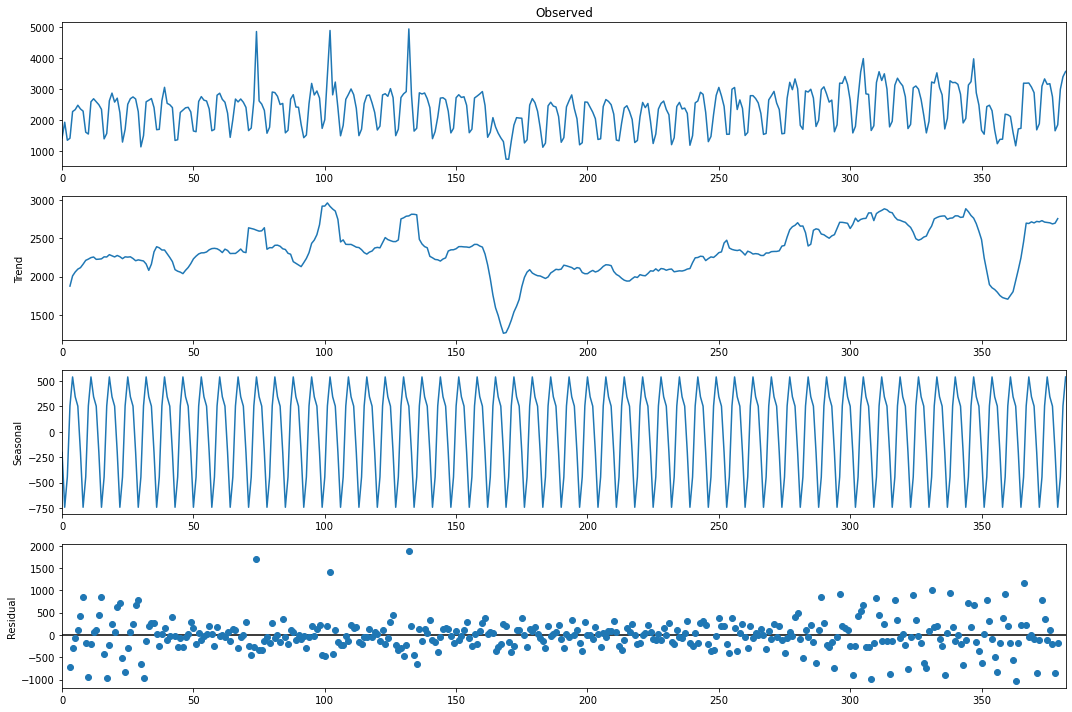

In [39]:
sm.tsa.seasonal_decompose(list_y, period=7).plot();
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(list_y)[1])

p-value in Dickey-Fuller test is 0.015 < 0.05, so the time series is stationary

## Task 5

In [40]:
from itertools import product
from tqdm import tqdm

# setting initial values and some bounds for them
ps = range(1, 2)
ds = range(0, 2)
qs = range(1, 3)
Ps = range(3, 4)
Ds = range(0, 3)
Qs = range(0, 2)
s = 12  # season length is 12 ?

# creating list with all the possible combinations of parameters
parameters = product(ps, ds, qs, Ps, Ds, Qs)
parameters_list = list(parameters)
len(parameters_list)

24

In [44]:
def optimizeSARIMA(parameters_list, s):
    """
        Return dataframe with parameters and corresponding AIC

        parameters_list - list with (p, d, q, P, D, Q) tuples
        s - length of season
    """

    results = []
    best_aic = float("inf")

    for param in tqdm(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model = sm.tsa.statespace.SARIMAX(
                # df_train['y'].values
                list_y,
                order=(param[0], param[1], param[2]),
                seasonal_order=(param[3], param[4], param[5], s),
            ).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ["parameters", "aic"]
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by="aic", ascending=True).reset_index(
        drop=True
    )

    return result_table

In [45]:
%%time
result_table = optimizeSARIMA(parameters_list, s)

  4%|▍         | 1/24 [00:02<01:04,  2.82s/it]D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

 17%|█▋        | 4/24 [00:27<02:36,  7.80s/it]D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

 21%|██        | 5/24 [00:48<03:59, 12.59s/it]D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

 33%|███▎      | 8/24 [01:36<03:29, 13.12s/it]D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

 38%|███▊      | 9/24 [01:51<03:26, 13.74s/it]D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



CPU times: total: 45min 54s
Wall time: 6min 21s


In [46]:
result_table.head(n=5)

parameters          aic
0  (1, 1, 1, 3, 1, 1)   405.915674
1  (1, 1, 2, 3, 2, 1)  5548.863584
2  (1, 0, 1, 3, 2, 1)  5604.782668
3  (1, 0, 2, 3, 2, 1)  5607.099049
4  (1, 1, 2, 3, 1, 1)  5660.635418

p = 1, d = 1, q = 1, P = 3, D = 1, Q = 1 -- the best parameters for model with s = 12
answer is the second raw in dataframe...